In [1]:
import timm
import torch
import torchvision
from torchview import draw_graph

/home/vladimir/tfm/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
model = timm.create_model(
    'maxvit_tiny_tf_224.in1k',
    pretrained=True,
    num_classes=0,  # remove classifier nn.Linear
    no_jit=True
)

In [11]:
model

MaxxVit(
  (stem): Stem(
    (conv1): Conv2dSame(3, 64, kernel_size=(3, 3), stride=(2, 2))
    (norm1): BatchNormAct2d(
      64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): GELUTanh()
    )
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (stages): Sequential(
    (0): MaxxVitStage(
      (blocks): Sequential(
        (0): MaxxVitBlock(
          (conv): MbConvBlock(
            (shortcut): Downsample2d(
              (pool): AvgPool2dSame(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))
              (expand): Identity()
            )
            (pre_norm): BatchNormAct2d(
              64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
              (drop): Identity()
              (act): Identity()
            )
            (down): Identity()
            (conv1_1x1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (norm1): BatchNormAct2d(
      

In [13]:
model_graph = draw_graph(model, input_size=(1,3,224,224), expand_nested=True)
model_graph.visual_graph

In [3]:
from maxvit_transformer import MaxVitTransformer

In [4]:
model = MaxVitTransformer()

In [4]:
model

MaxVitTransformer(
  (model): MaxxVit(
    (stem): Stem(
      (conv1): Conv2dSame(3, 64, kernel_size=(3, 3), stride=(2, 2))
      (norm1): BatchNormAct2d(
        64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): GELUTanh()
      )
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (stages): Sequential(
      (0): MaxxVitStage(
        (blocks): Sequential(
          (0): MaxxVitBlock(
            (conv): MbConvBlock(
              (shortcut): Downsample2d(
                (pool): AvgPool2dSame(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0))
                (expand): Identity()
              )
              (pre_norm): BatchNormAct2d(
                64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
                (drop): Identity()
                (act): Identity()
              )
              (down): Identity()
              (conv1_1x1): Conv2d(64, 256, kernel_siz

In [5]:
img = torch.rand((2,3,224,224), dtype=torch.float32)
output = model(img)

In [8]:
import torch
import torch.nn as nn

# Assuming you have the target values
targets = torch.tensor([[1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1], [1, 0], [0, 1]])

# Assuming you have the output
# output = [torch.tensor([[-0.0249, 0.0991]]), torch.tensor([[-0.1355, -0.0978]]), torch.tensor([[0.1073, -0.0110]]), torch.tensor([[0.0873, -0.1508]]), torch.tensor([[-0.0300, 0.1163]]), torch.tensor([[0.0107, 0.0950]]), torch.tensor([[-0.0467, 0.0918]]), torch.tensor([[-0.0066, 0.0040]]), torch.tensor([[0.0597, -0.0886]]), torch.tensor([[-0.1488, -0.1139]]), torch.tensor([[0.1449, 0.1162]]), torch.tensor([[0.1001, 0.1511]]), torch.tensor([[-0.0551, 0.1024]]), torch.tensor([[-0.0745, -0.0954]])]

# Calculate the binary cross-entropy loss
loss_fn = nn.BCEWithLogitsLoss()
loss = 0

for i in range(len(output)):
    loss += loss_fn(output[i], targets[i].float())
print(loss)
average_loss = loss / len(output)

print("Average Loss:", average_loss.item())


ValueError: Target size (torch.Size([2])) must be the same as input size (torch.Size([1, 2]))

In [10]:
print(output)

[tensor([[0.0806, 0.1270],
        [0.0844, 0.1221]], grad_fn=<AddmmBackward0>), tensor([[-0.1056,  0.0441],
        [-0.1046,  0.0463]], grad_fn=<AddmmBackward0>), tensor([[0.0946, 0.0933],
        [0.0883, 0.0912]], grad_fn=<AddmmBackward0>), tensor([[-0.0482,  0.0129],
        [-0.0522,  0.0051]], grad_fn=<AddmmBackward0>), tensor([[-0.1348, -0.0177],
        [-0.1380, -0.0189]], grad_fn=<AddmmBackward0>), tensor([[ 0.0539, -0.1293],
        [ 0.0576, -0.1243]], grad_fn=<AddmmBackward0>), tensor([[ 0.0957, -0.0708],
        [ 0.1138, -0.0735]], grad_fn=<AddmmBackward0>), tensor([[0.0951, 0.0719],
        [0.0905, 0.0809]], grad_fn=<AddmmBackward0>), tensor([[ 0.0374, -0.0196],
        [ 0.0503, -0.0029]], grad_fn=<AddmmBackward0>), tensor([[-0.0888,  0.0881],
        [-0.1014,  0.0959]], grad_fn=<AddmmBackward0>), tensor([[-0.1705, -0.1477],
        [-0.1481, -0.1370]], grad_fn=<AddmmBackward0>), tensor([[-0.0627,  0.0821],
        [-0.0574,  0.0821]], grad_fn=<AddmmBackward0>), ten

In [11]:
print(output[0].shape)

torch.Size([2, 2])


In [11]:
import config
cf = config._C.clone()

In [14]:
from data.build import build_transform
transform = build_transform(True, cf)

In [60]:
del transform.transforms[-2]

In [61]:
transform

Compose(
    RandomResizedCropAndInterpolation(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bicubic)
    RandomHorizontalFlip(p=0.5)
    RandAugment(n=2, ops=
	AugmentOp(name=AutoContrast, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Equalize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Invert, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Rotate, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=PosterizeIncreasing, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=SolarizeIncreasing, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=SolarizeAdd, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ColorIncreasing, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ContrastIncreasing, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=BrightnessIncreasing, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=SharpnessIncreasing, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ShearX, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ShearY, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=TranslateXRel, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=TranslateYRel, p=0.5, m=9, mstd=0.5))
    ToTensor()
    Rand

In [62]:
from torch.utils.data import Dataset
from torch.utils import data
import os
from PIL import Image

class CustomDataSet(Dataset):
    def __init__(self, main_dir, transform):
        self.main_dir = main_dir
        self.transform = transform
        all_imgs = os.listdir(main_dir)
        self.total_imgs = sorted(all_imgs)

    def __len__(self):
        return len(self.total_imgs)

    def __getitem__(self, idx):
        img_loc = os.path.join(self.main_dir, self.total_imgs[idx])
        image = Image.open(img_loc).convert("RGB")
        tensor_image = self.transform(image).permute(1, 2, 0)
        return tensor_image

In [63]:
my_dataset = CustomDataSet('../data/images/', transform=transform)
data_loader = data.DataLoader(my_dataset , batch_size=8, shuffle=False, 
                               num_workers=1, drop_last=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


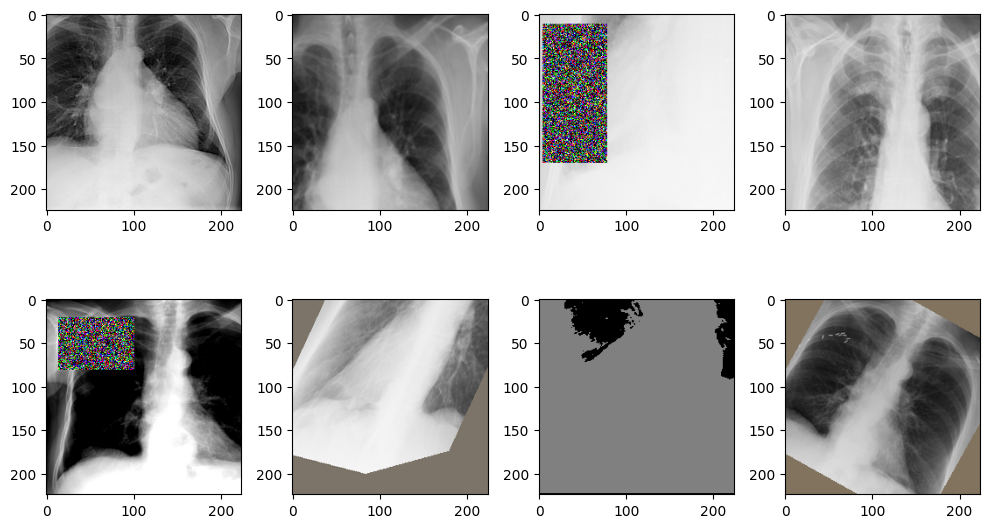

In [71]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,4, figsize=(10,6))
imgs = next(iter(data_loader))
for i in range(2):
    for j in range(4):
        ax[i,j].imshow(imgs[i*4 + j])
fig.tight_layout()
plt.show()